In [5]:
import pandas as pd

# Load the training data
train_data = pd.read_csv("/home/user/Portofolio/Fuel Gas Emission NOX Predictor/archive/test.csv")

# Load the test data
test_data = pd.read_csv("/home/user/Portofolio/Fuel Gas Emission NOX Predictor/archive/test.csv")

# Print the first few rows of the training data to see the available columns
print("Training data head:")
print(train_data.head())

# Print the first few rows of the test data to see the available columns
print("\nTest data head:")
print(test_data.head())


Training data head:
        AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  26.7190  1015.1  66.716  3.3469  20.501  1061.7  550.22  111.54  10.649   
1  12.8100  1010.8  97.559  4.5922  24.477  1086.4  549.95  134.39  11.952   
2  15.9570  1003.9  97.333  3.2234  19.502  1056.2  549.91  111.76  10.583   
3   5.6085  1016.0  72.342  3.8608  23.498  1084.2  549.91  134.74  11.772   
4  13.0930  1021.9  72.858  3.5396  24.219  1086.9  549.80  133.48  11.896   

        CO  
0  1.96560  
1  0.76573  
2  3.29990  
3  1.46490  
4  1.46430  

Test data head:
        AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  26.7190  1015.1  66.716  3.3469  20.501  1061.7  550.22  111.54  10.649   
1  12.8100  1010.8  97.559  4.5922  24.477  1086.4  549.95  134.39  11.952   
2  15.9570  1003.9  97.333  3.2234  19.502  1056.2  549.91  111.76  10.583   
3   5.6085  1016.0  72.342  3.8608  23.498  1084.2  549.91  134.74  11.772   
4  13.0930  1021.9  72.858

Mean Squared Error (Extra Trees Regression) on Training Data: 9.893378516076401e-27
      True NOX  Predicted NOX
0       74.117         74.117
1       61.887         61.887
2       75.568         75.568
3       52.580         52.580
4       69.873         69.873
...        ...            ...
5182    58.918         58.918
5183    60.109         60.109
5184    63.901         63.901
5185    79.388         79.388
5186    83.631         83.631

[5187 rows x 2 columns]


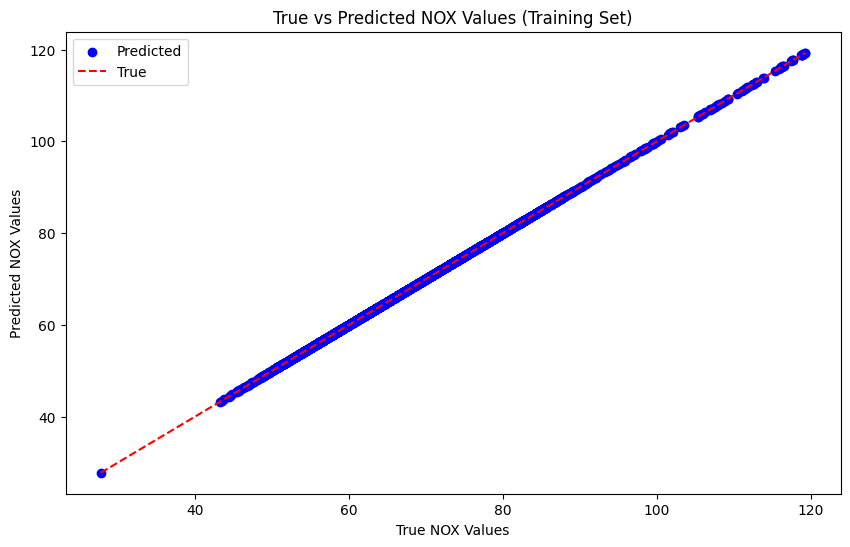

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Load the training data
train_data = pd.read_csv("/home/user/Portofolio/Fuel Gas Emission NOX Predictor/archive/train.csv")

# Load the test data
test_data = pd.read_csv("/home/user/Portofolio/Fuel Gas Emission NOX Predictor/archive/test.csv")

# Extract features (X) and target (y) from the training data
X_train = train_data.drop(columns=['NOX'])
y_train = train_data['NOX']

# Initialize the Extra Trees Regression model
model_extra_trees = ExtraTreesRegressor(random_state=79)

# Train the model
model_extra_trees.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_extra_trees = model_extra_trees.predict(X_train)

# Compare the predicted NOX values with the real NOX values from the training data
train_true_nox_values = y_train

# Calculate Mean Squared Error on the training data
mse_train_extra_trees = mean_squared_error(train_true_nox_values, train_predictions_extra_trees)
print("Mean Squared Error (Extra Trees Regression) on Training Data:", mse_train_extra_trees)

# Compare predicted and true values on the training data
comparison_train_df = pd.DataFrame({'True NOX': train_true_nox_values, 'Predicted NOX': train_predictions_extra_trees})
print(comparison_train_df)

import matplotlib.pyplot as plt

# Plot true vs predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(train_true_nox_values, train_predictions_extra_trees, color='blue', label='Predicted')
plt.plot([train_true_nox_values.min(), train_true_nox_values.max()], 
         [train_true_nox_values.min(), train_true_nox_values.max()], 
         color='red', linestyle='--', label='True')
plt.xlabel('True NOX Values')
plt.ylabel('Predicted NOX Values')
plt.title('True vs Predicted NOX Values (Training Set)')
plt.legend()
plt.show()

/home/user/Documents/arienv/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


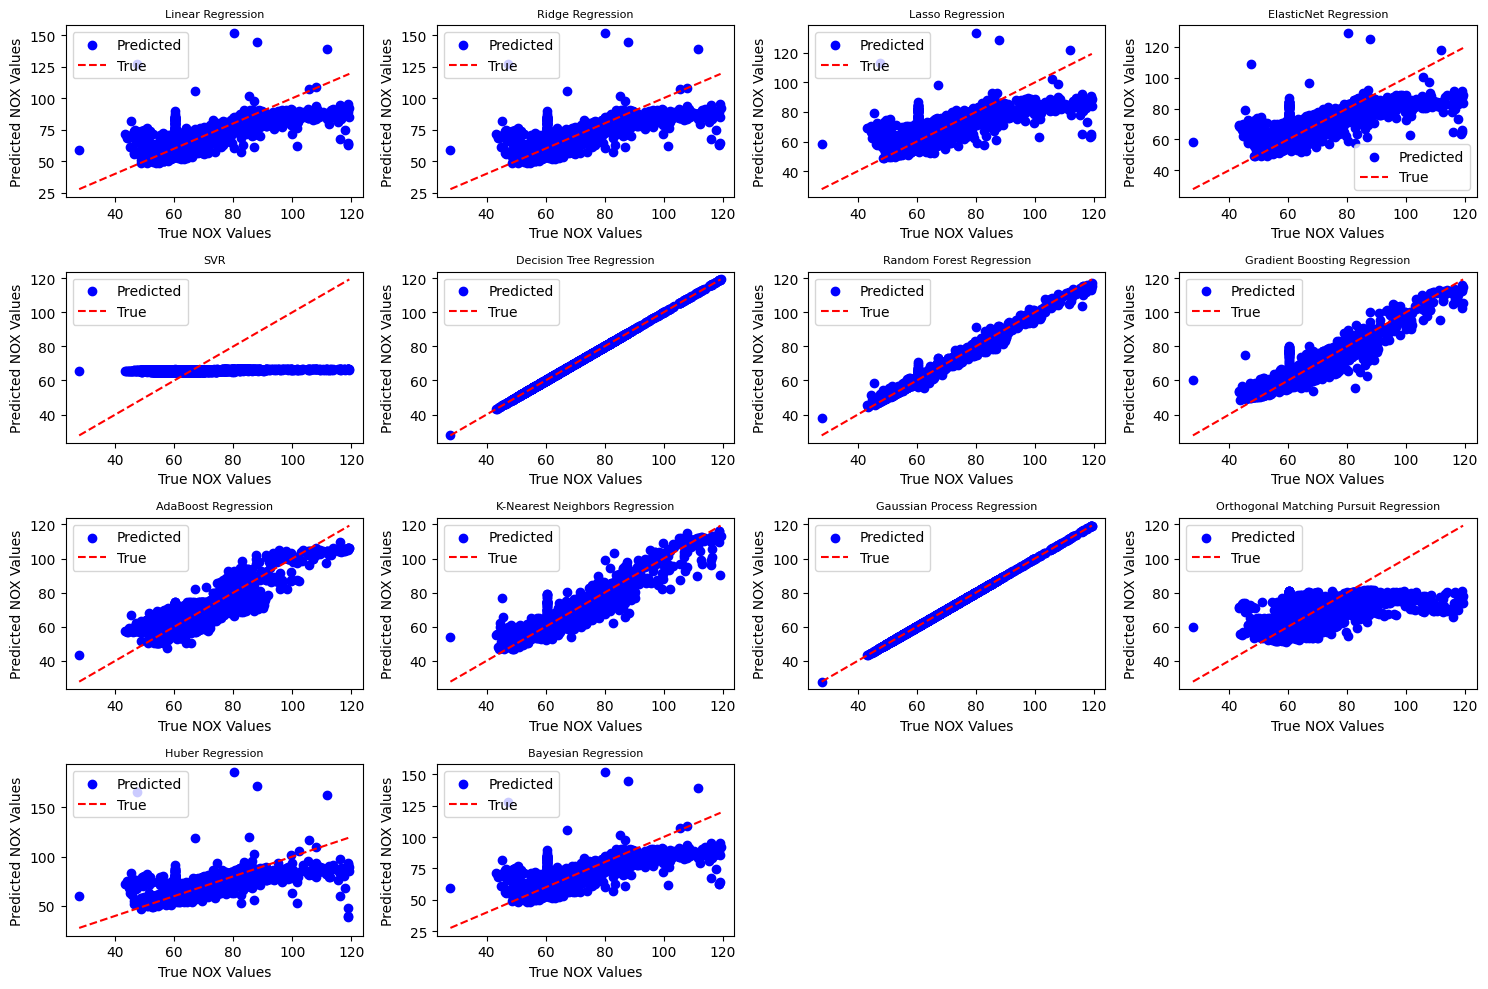

Mean Squared Error (Linear Regression) on Training Data: 38.23930247134531
Mean Squared Error (Ridge Regression) on Training Data: 38.23944428898507
Mean Squared Error (Lasso Regression) on Training Data: 41.14921443826976
Mean Squared Error (ElasticNet Regression) on Training Data: 41.12179645316237
Mean Squared Error (SVR) on Training Data: 114.3675010910222
Mean Squared Error (Decision Tree Regression) on Training Data: 0.0
Mean Squared Error (Random Forest Regression) on Training Data: 1.394100587741787
Mean Squared Error (Gradient Boosting Regression) on Training Data: 10.205995165543614
Mean Squared Error (AdaBoost Regression) on Training Data: 38.14596647517373
Mean Squared Error (K-Nearest Neighbors Regression) on Training Data: 9.73090499679969
Mean Squared Error (Gaussian Process Regression) on Training Data: 2.6857784988981544e-17
Mean Squared Error (Orthogonal Matching Pursuit Regression) on Training Data: 66.58873744058468
Mean Squared Error (Huber Regression) on Training 

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit, HuberRegressor, BayesianRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Define a dictionary of regression methods
regression_methods = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Gaussian Process Regression': GaussianProcessRegressor(),
    'Orthogonal Matching Pursuit Regression': OrthogonalMatchingPursuit(),
    'Huber Regression': HuberRegressor(),
    'Bayesian Regression': BayesianRidge(),
}

# Load the training data
train_data = pd.read_csv("/home/user/Portofolio/Fuel Gas Emission NOX Predictor/archive/train.csv")

# Extract features (X) and target (y) from the training data
X_train = train_data.drop(columns=['NOX'])
y_train = train_data['NOX']

# Initialize dictionaries to store MSE and comparison data for each method
mse_train = {}
comparison_data = {}
plot_index = 1

# Set the font size for subplot titles
plt.rcParams['axes.titlesize'] = 8

# Create the plot
plt.figure(figsize=(15, 10))
for method_name, model in regression_methods.items():
    # Handle Isotonic Regression separately
    if method_name == 'Isotonic Regression':
        # Select one feature (e.g., the first feature) from X_train
        feature = X_train.iloc[:, 0]
        # Train the model
        model.fit(feature, y_train)
        # Make predictions on the training set
        train_predictions = model.predict(feature)
    else:
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions on the training set
        train_predictions = model.predict(X_train)
    
    # Calculate Mean Squared Error on the training data
    mse_train[method_name] = mean_squared_error(y_train, train_predictions)
    
    # Store comparison data for plotting
    comparison_data[method_name] = {'True NOX': y_train, 'Predicted NOX': train_predictions}
    
    # Plot true vs predicted values for each regression method
    plt.subplot(4, 4, plot_index)
    plt.scatter(y_train, train_predictions, color='blue', label='Predicted')
    plt.plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             color='red', linestyle='--', label='True')
    plt.xlabel('True NOX Values')
    plt.ylabel('Predicted NOX Values')
    plt.title(f'{method_name}')
    plt.legend()
    plot_index += 1

plt.tight_layout()
plt.show()

# Print MSE for each regression method
for method_name, mse in mse_train.items():
    print(f"Mean Squared Error ({method_name}) on Training Data:", mse)
